<a href="https://colab.research.google.com/github/GiovanniBorrelli/RetiGeografiche/blob/main/Grafici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HuggingFace Models

You can find our HuggingFace models here:


| Model                       | Download |
| ------                      | -------------------------|
| `feel-it-italian-sentiment` | [Link](https://huggingface.co/MilaNLProc/feel-it-italian-sentiment) |
| `feel-it-italian-emotion`   | [Link](https://huggingface.co/MilaNLProc/feel-it-italian-emotion) |

In [1]:
%%capture
!pip install feel-it

In [2]:
!pip install transformers==4.11.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 28.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


### Emotion Classification

In [5]:
from feel_it import EmotionClassifier
emotion_classifier = EmotionClassifier()

In [ ]:
emotion_classifier.predict(["sono molto felice di questo risultato",
                            "ma che cazzo vuoi",
                            "che brutta cosa...mi stanno scendendo le lacrime...",
                            "sì ok ma che spavento che mi sono preso"])

['joy', 'anger', 'sadness', 'fear']

In [7]:
import pandas as pd

# Funzione per determinare l'emozione relativa a una frase
def determina_emozione(frase, classifier):
    emozione = classifier.predict(frase)
    return emozione

# Carica il file XLSX
file_input = "frasiFinale.xlsx"
dataframe = pd.read_excel(file_input)

# Inizializza l'oggetto EmotionClassifier
classifier = EmotionClassifier()

# Lista per memorizzare l'emozione di ogni frase
emozioni = []

# Analizza ogni frase nel DataFrame
for frase in dataframe["Frase"]:
    emozione = determina_emozione(frase, classifier)
    emozioni.append(emozione)

# Aggiungi la colonna "Emozione" al DataFrame
dataframe["Emozione"] = emozioni

# Conta il numero di frasi per ogni emozione
conteggio_emozioni = dataframe["Emozione"].value_counts()

# Stampa il conteggio delle emozioni
print("Conteggio delle emozioni:")
print(conteggio_emozioni)

# Salva il DataFrame con la colonna aggiuntiva in un nuovo file XLSX
file_output = "output_con_emozioni.xlsx"
dataframe.to_excel(file_output, index=False)
print(f"Il file con le emozioni è stato salvato come '{file_output}'")


ValueError: not enough values to unpack (expected 2, got 1)

In [13]:
import pandas as pd
from feel_it import EmotionClassifier

# Funzione per determinare l'emozione relativa a una frase
def determina_emozione(frase, classifier):
    emozione = classifier.predict([frase])[0]
    return emozione

# Carica il file XLSX
file_input = "prova.xlsx"
dataframe = pd.read_excel(file_input)

# Inizializza l'oggetto EmotionClassifier
emotion_classifier = EmotionClassifier()

# Lista per memorizzare l'emozione di ogni frase
emozioni = []

# Analizza ogni frase nel DataFrame
for frase in dataframe["Frase"]:
    emozione = determina_emozione(frase, emotion_classifier)
    emozioni.append(emozione)

# Aggiungi la colonna "Emozione" al DataFrame
dataframe["Emozione"] = emozioni

# Salva il DataFrame con la colonna aggiuntiva in un nuovo file XLSX
file_output = "output_con_emozioni.xlsx"
dataframe.to_excel(file_output, index=False)
print(f"Il file con le emozioni è stato salvato come '{file_output}'")


Il file con le emozioni è stato salvato come 'output_con_emozioni.xlsx'


In [14]:
import pandas as pd
from feel_it import EmotionClassifier, SentimentClassifier

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/794k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/299 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Il file con le emozioni e i sentimenti è stato salvato come 'output_con_emozioni_e_sentimenti.xlsx'


In [22]:
# Funzione per determinare l'emozione relativa a una frase
def determina_emozione(frase, emotion_classifier):
    emozione = emotion_classifier.predict([frase])[0]
    return emozione

# Funzione per determinare il sentimento relativo a una frase
def determina_sentimento(frase, sentiment_classifier):
    sentimento = sentiment_classifier.predict([frase])[0]
    return sentimento

# Carica il file XLSX
file_input = "prova.xlsx"
dataframe = pd.read_excel(file_input)

# Inizializza gli oggetti EmotionClassifier e SentimentClassifier
emotion_classifier = EmotionClassifier()
sentiment_classifier = SentimentClassifier()

# Lista per memorizzare l'emozione e il sentimento di ogni frase
emozioni = []
sentimenti = []

# Analizza ogni frase nel DataFrame
for frase in dataframe["Frase"]:
    emozione = determina_emozione(frase, emotion_classifier)
    sentimento = determina_sentimento(frase, sentiment_classifier)
    emozioni.append(emozione)
    sentimenti.append(sentimento)

# Aggiungi le colonne "Emozione" e "Sentimento" al DataFrame
dataframe["Emozione"] = emozioni
dataframe["Sentimento"] = sentimenti

# Salva il DataFrame con le colonne aggiuntive in un nuovo file XLSX
file_output = "output_con_emozioni_e_sentimenti.xlsx"
dataframe.to_excel(file_output, index=False)
print(f"Il file con le emozioni e i sentimenti è stato salvato come '{file_output}'")

Il file con le emozioni e i sentimenti è stato salvato come 'output_con_emozioni_e_sentimenti.xlsx'


In [23]:
pip install tqdm

In [25]:
import pandas as pd
from feel_it import EmotionClassifier, SentimentClassifier
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Carica il file XLSX
file_input = "input.xlsx"
dataframe = pd.read_excel(file_input)

# Inizializza gli oggetti EmotionClassifier e SentimentClassifier
emotion_classifier = EmotionClassifier()
sentiment_classifier = SentimentClassifier()

# Funzione per predire emozioni e sentimenti per una lista di frasi
def predici_emozioni_sentimenti(frase):
    emozione = emotion_classifier.predict([frase])[0]
    sentimento = sentiment_classifier.predict([frase])[0]
    return emozione, sentimento

# Utilizza il ThreadPoolExecutor per parallelizzare le predizioni
with ThreadPoolExecutor() as executor:
    risultati = list(tqdm(executor.map(predici_emozioni_sentimenti, dataframe["Frase"]), total=len(dataframe)))

# Estrai le emozioni e i sentimenti dai risultati
emozioni, sentimenti = zip(*risultati)

# Aggiungi le colonne "Emozione" e "Sentimento" al DataFrame
dataframe["Emozione"] = emozioni
dataframe["Sentimento"] = sentimenti

# Salva il DataFrame con le colonne aggiuntive in un nuovo file XLSX
file_output = "output_con_emozioni_e_sentimenti.xlsx"
dataframe.to_excel(file_output, index=False)
print(f"Il file con le emozioni e i sentimenti è stato salvato come '{file_output}'")


100%|██████████| 29828/29828 [1:40:59<00:00,  4.92it/s]


Il file con le emozioni e i sentimenti è stato salvato come 'output_con_emozioni_e_sentimenti.xlsx'


In [21]:
import pandas as pd
from feel_it import EmotionClassifier, SentimentClassifier
from concurrent.futures import ThreadPoolExecutor

# Carica il file XLSX
file_input = "input.xlsx"
dataframe = pd.read_excel(file_input)

# Inizializza gli oggetti EmotionClassifier e SentimentClassifier
emotion_classifier = EmotionClassifier()
sentiment_classifier = SentimentClassifier()

# Funzione per predire emozioni e sentimenti per una lista di frasi
def predici_emozioni_sentimenti(frase):
    emozione = emotion_classifier.predict([frase])[0]
    sentimento = sentiment_classifier.predict([frase])[0]
    return emozione, sentimento

# Utilizza il ThreadPoolExecutor per parallelizzare le predizioni
with ThreadPoolExecutor() as executor:
    risultati = list(executor.map(predici_emozioni_sentimenti, dataframe["Frase"]))

# Estrai le emozioni e i sentimenti dai risultati
emozioni, sentimenti = zip(*risultati)

# Aggiungi le colonne "Emozione" e "Sentimento" al DataFrame
dataframe["Emozione"] = emozioni
dataframe["Sentimento"] = sentimenti

# Salva il DataFrame con le colonne aggiuntive in un nuovo file XLSX
file_output = "output_con_emozioni_e_sentimenti.xlsx"
dataframe.to_excel(file_output, index=False)
print(f"Il file con le emozioni e i sentimenti è stato salvato come '{file_output}'")


KeyboardInterrupt: 

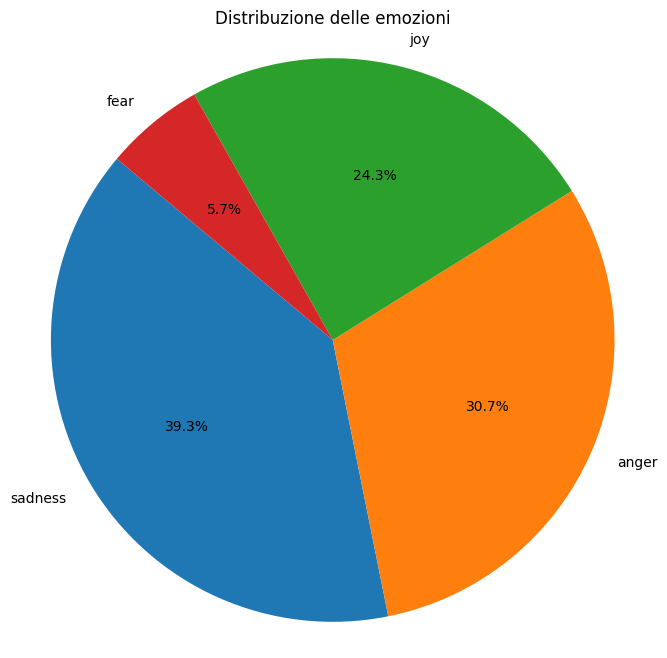

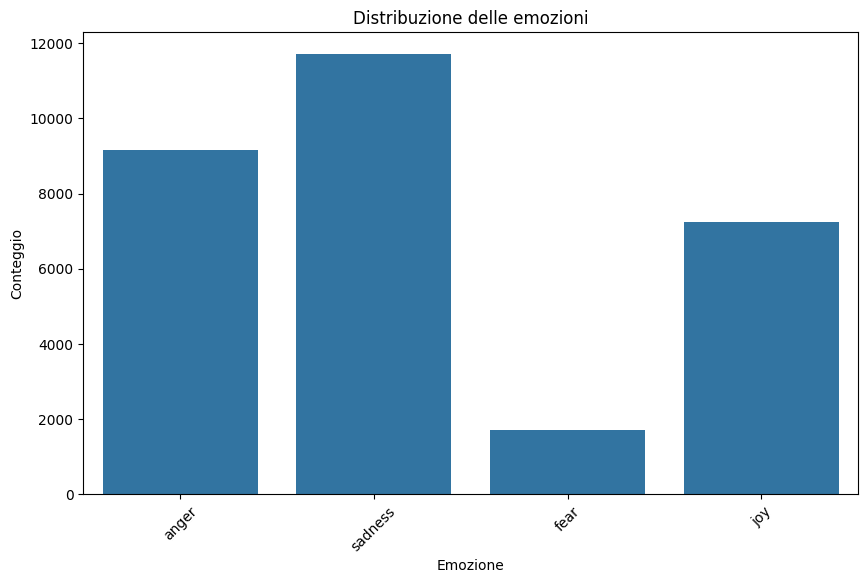

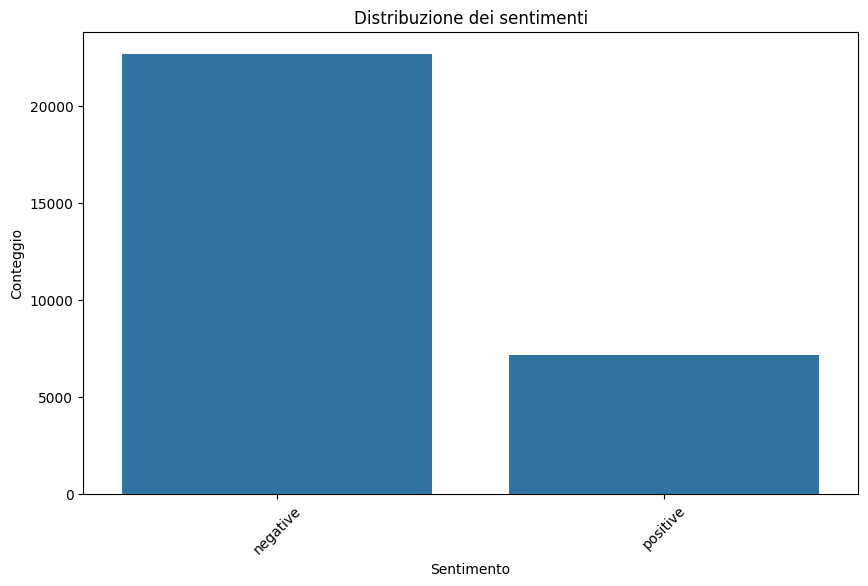

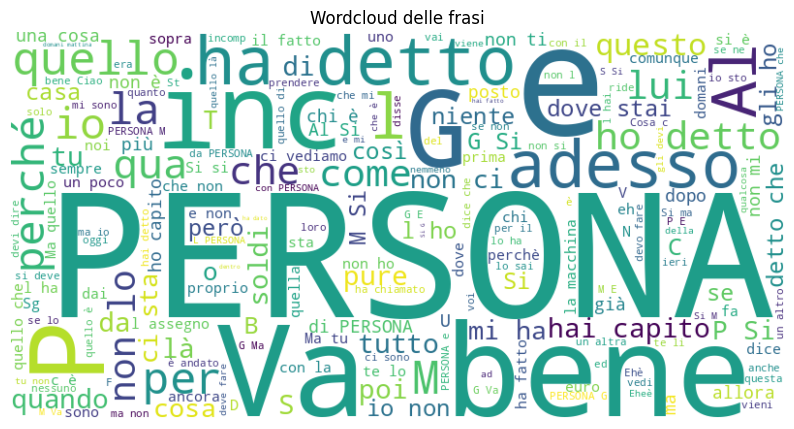

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Carica il file Excel
file_input = "output_con_emozioni_e_sentimenti.xlsx"
dataframe = pd.read_excel(file_input)

# Grafico a torta delle emozioni
emozioni_count = dataframe['Emozione'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emozioni_count, labels=emozioni_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle emozioni')
plt.axis('equal')
plt.show()

# Grafico a barre delle emozioni
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='Emozione')
plt.title('Distribuzione delle emozioni')
plt.xlabel('Emozione')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

# Grafico a barre dei sentimenti
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='Sentimento')
plt.title('Distribuzione dei sentimenti')
plt.xlabel('Sentimento')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

# Wordcloud delle frasi
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataframe['Frase']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud delle frasi')
plt.axis('off')
plt.show()

# Scatter plot delle emozioni e sentimenti
fig = px.scatter(dataframe, x='Emozione', y='Sentimento', title='Scatter plot delle emozioni e sentimenti')
fig.show()

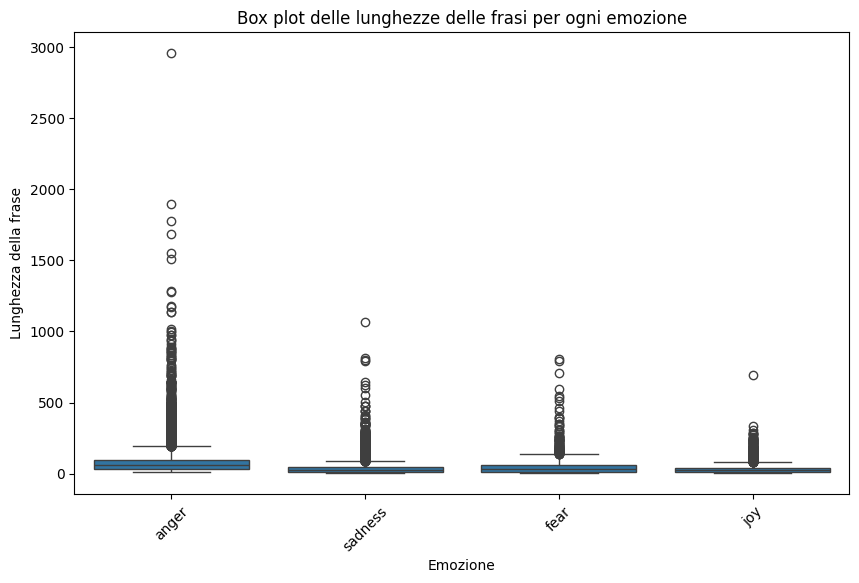

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='Emozione', y=dataframe['Frase'].apply(len))
plt.title('Box plot delle lunghezze delle frasi per ogni emozione')
plt.xlabel('Emozione')
plt.ylabel('Lunghezza della frase')
plt.xticks(rotation=45)
plt.show()

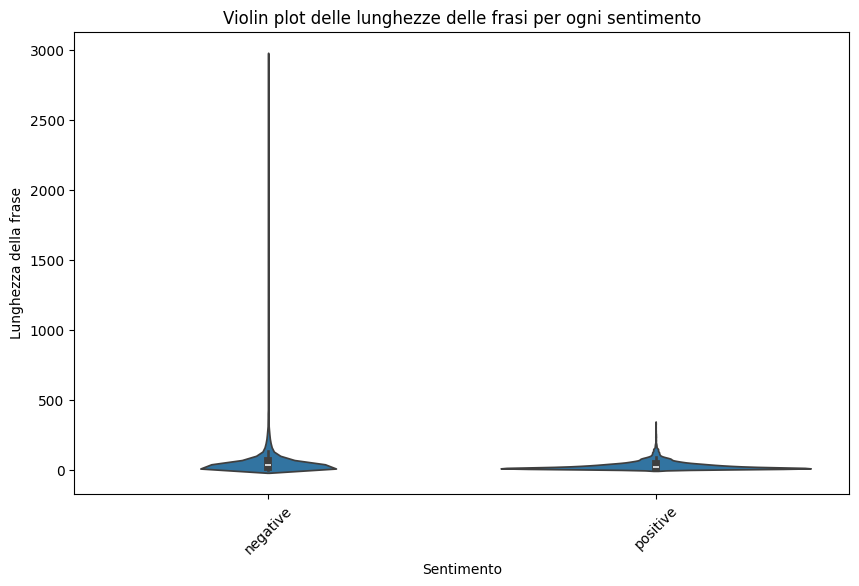

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataframe, x='Sentimento', y=dataframe['Frase'].apply(len))
plt.title('Violin plot delle lunghezze delle frasi per ogni sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Lunghezza della frase')
plt.xticks(rotation=45)
plt.show()


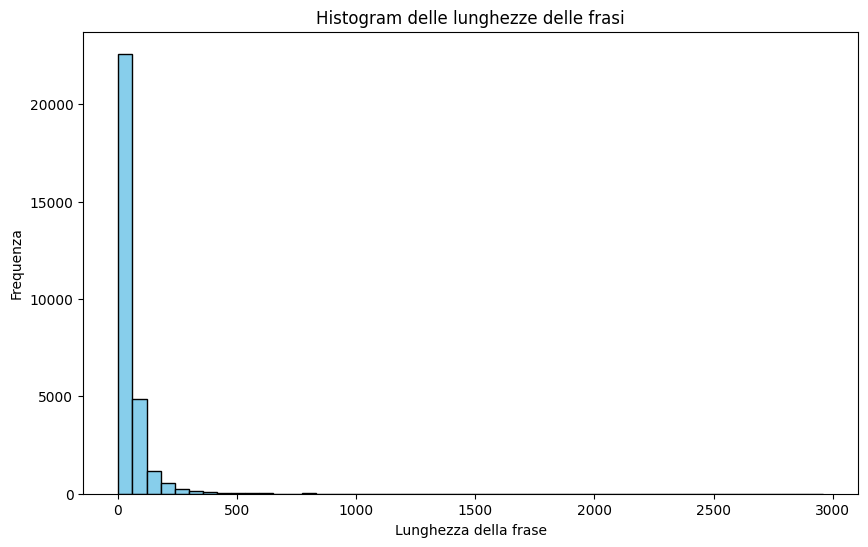

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Frase'].apply(len), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram delle lunghezze delle frasi')
plt.xlabel('Lunghezza della frase')
plt.ylabel('Frequenza')
plt.show()


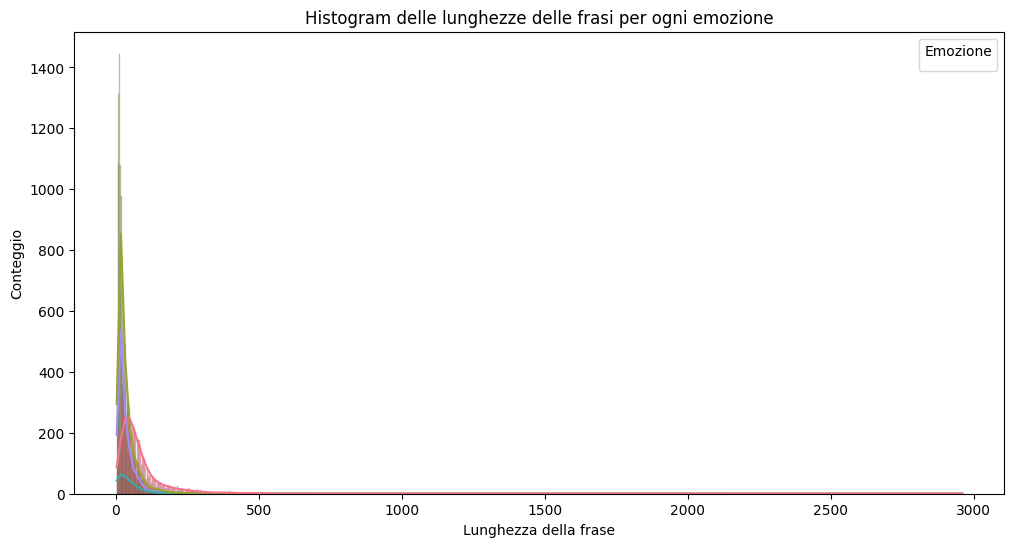

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataframe, x=dataframe['Frase'].apply(len), hue='Emozione', kde=True, palette='husl')
plt.title('Histogram delle lunghezze delle frasi per ogni emozione')
plt.xlabel('Lunghezza della frase')
plt.ylabel('Conteggio')
plt.legend(title='Emozione')
plt.show()


<Figure size 1000x800 with 0 Axes>

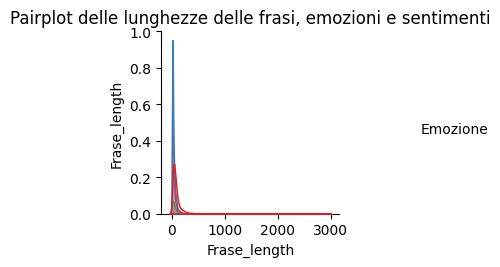

In [37]:
plt.figure(figsize=(10, 8))
sns.pairplot(dataframe[['Frase', 'Emozione', 'Sentimento']].assign(Frase_length=dataframe['Frase'].apply(len)), hue='Emozione', palette='Set1')
plt.title('Pairplot delle lunghezze delle frasi, emozioni e sentimenti')
plt.show()


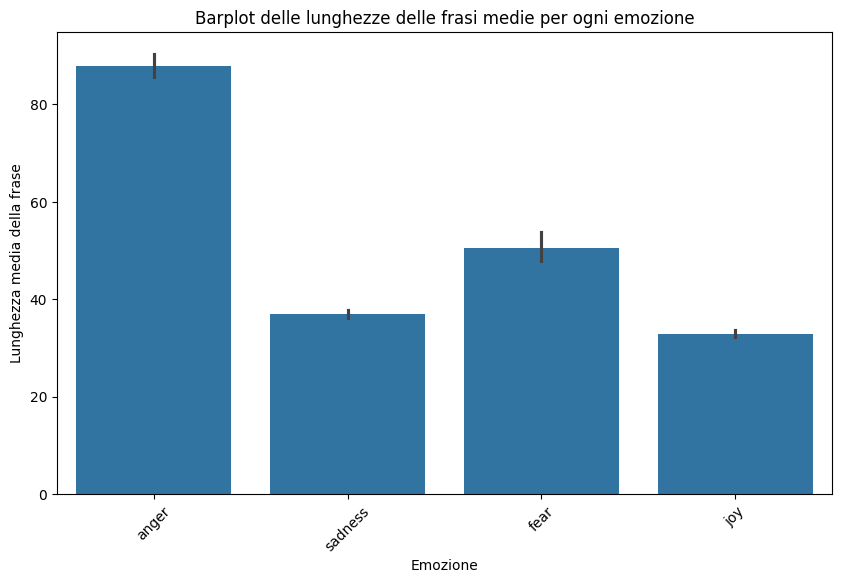

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataframe, x='Emozione', y=dataframe['Frase'].apply(len), estimator=lambda x: sum(x) / len(x))
plt.title('Barplot delle lunghezze delle frasi medie per ogni emozione')
plt.xlabel('Emozione')
plt.ylabel('Lunghezza media della frase')
plt.xticks(rotation=45)
plt.show()


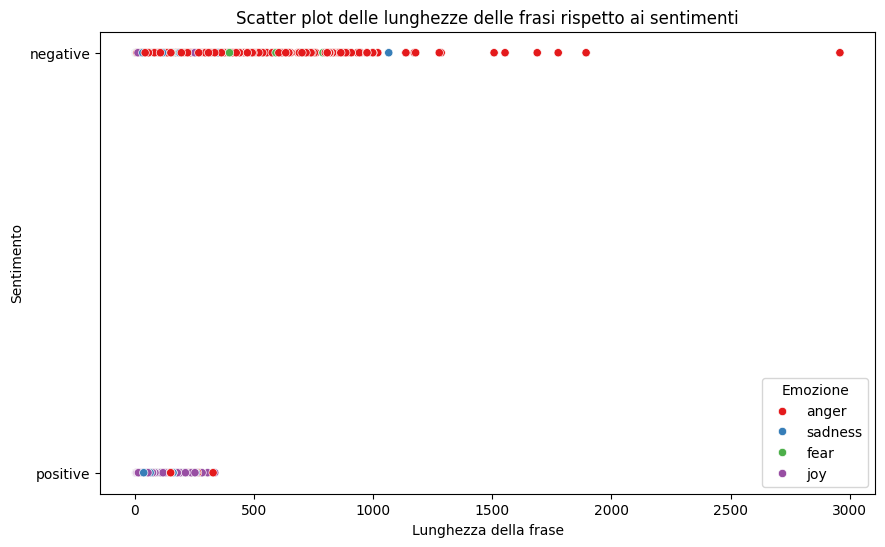

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x=dataframe['Frase'].apply(len), y='Sentimento', hue='Emozione', palette='Set1')
plt.title('Scatter plot delle lunghezze delle frasi rispetto ai sentimenti')
plt.xlabel('Lunghezza della frase')
plt.ylabel('Sentimento')
plt.show()
